# Median Ages

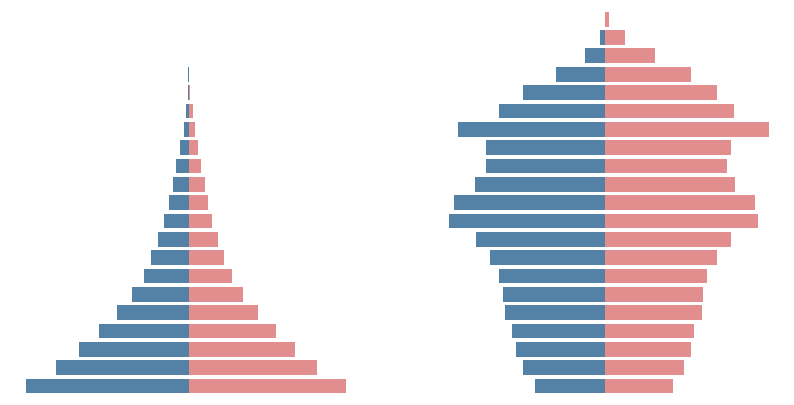

In [12]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file
niger = pd.read_csv("data/Niger-2022.csv")
japan = pd.read_csv("data/Japan-2022.csv")

# Prepare to plot
niger["M"] = -niger["M"]
japan["M"] = -japan["M"]

# Plot
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

sns.barplot(ax=ax[0], x="F", y="Age", data=niger, color="lightcoral")
sns.barplot(ax=ax[0], x="M", y="Age", data=niger, color="steelblue")
sns.barplot(ax=ax[1], x="F", y="Age", data=japan, color="lightcoral")
sns.barplot(ax=ax[1], x="M", y="Age", data=japan, color="steelblue")

ax[0].invert_yaxis()
ax[0].axis("off")
ax[1].axis("off")

plt.show()

Population pyramid of Niger (left) and Japan (right) in 2022.

Apr, 2023
> *Data Analysis*

## Background
Given a certain group, how many people there are older than you? And how many are younger than you? When you are a newborn, everybody else is older. When you are the oldest one, everybody else is younger. In between, there will be a percentage of people older than you, and a complementary percentage younger than you.

The *median age* is defined so that 50% of the people are older and 50% are younger. The global average median age was 30 years in 2021 – half of the world population was older than 30 years, and the other half was younger. Japan has the highest median age at almost 49 years. One of the lowest is Niger at some 15 years. The median age in Spain is around 44 years.

When I turned 49 last year, it was clear to me that I had already left behind half of my life (life expectancy is some 84 years here). But population is aging in my town and I wondered where I was among my fellow citizens. It could be the case that even if I had left behind the *middle* age, I was still around the *median* age!

## The data
Instead of downloading the CSV, I provided the URL from https://www.gipuzkoairekia.eus/ to directly access the [data](https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/detail/detailView/ca39b82b-3444-4e47-8d9a-8dcfa9355f80): population of [Urretxu](https://en.wikipedia.org/wiki/Urretxu) in **2022** according to the age, gender and neighbourhood.

In [13]:
# Define URL of the data
url = 'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/a4085d92-8e7e-4a2c-9472-16a2b7aa9a4f'

# Read the data
pop = pd.read_csv(url,
                  encoding="iso-8859-1",
                  sep=";",
                  on_bad_lines="skip",
                  usecols=["NOMBRE CALLE", "EDAD", "CANTIDAD MUJERES", "CANTIDAD HOMBRES"])

print(pop)

         NOMBRE CALLE EDAD  CANTIDAD MUJERES  CANTIDAD HOMBRES
0            AREIZAGA    1                 1                 0
1            AREIZAGA    2                 2                 0
2            AREIZAGA    3                 0                 2
3            AREIZAGA    4                 2                 0
4            AREIZAGA    5                 0                 2
...               ...  ...               ...               ...
1799  BASAGASTI KALEA   78                 1                 0
1800  BASAGASTI KALEA   79                 0                 0
1801  BASAGASTI KALEA   80                 0                 0
1802  BASAGASTI KALEA  >80                 2                 1
1803  BASAGASTI KALEA  000                 0                 2

[1804 rows x 4 columns]


## Data validation
Unfortunately, the number of the people over the age of 80 is aggregated and appears with the label ">80". I will replace the label to "81", and make it a number. I will consider that the people over 80 are all of them 81 years old (yes, it will look strange in the graphic representations but further information is missing).

In [14]:
# Replacement
pop = pop.replace(">80", "81")

# Convert to integer
pop["EDAD"] = pop["EDAD"].astype(int)

# Show dataframe info
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NOMBRE CALLE      1804 non-null   object
 1   EDAD              1804 non-null   int64 
 2   CANTIDAD MUJERES  1804 non-null   int64 
 3   CANTIDAD HOMBRES  1804 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 56.5+ KB


## Population pyramid
Let's build the population pyramid for my town.

In [15]:
# Group by age and sum women and men quantities
pop_ages = pop.groupby("EDAD")[["CANTIDAD MUJERES", "CANTIDAD HOMBRES"]].sum()

# Establish age intervals for population pyramid
bins = pd.IntervalIndex.from_tuples([(i, i + 4) for i in range(0, 85, 5)], closed='both')

# Create new column with intervals
pop_ages["interval"] = pd.cut(pop_ages.index, bins)

# Group by intervals
pop_ages_pyr = pop_ages.groupby("interval")[["CANTIDAD MUJERES", "CANTIDAD HOMBRES"]].sum()

print(pop_ages_pyr)

          CANTIDAD MUJERES  CANTIDAD HOMBRES
interval                                    
[0, 4]                  88                95
[5, 9]                 110               124
[10, 14]               196               205
[15, 19]               194               212
[20, 24]               180               203
[25, 29]               153               157
[30, 34]               140               140
[35, 39]               138               175
[40, 44]               195               204
[45, 49]               301               288
[50, 54]               260               274
[55, 59]               272               289
[60, 64]               235               260
[65, 69]               206               176
[70, 74]               180               161
[75, 79]               167               137
[80, 84]               314               174


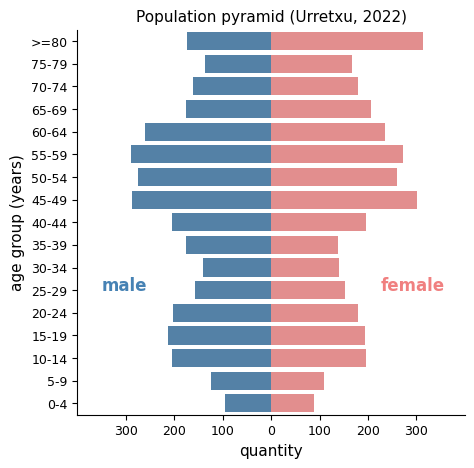

In [16]:
# Prepare to plot
pop_ages_pyr = pop_ages_pyr.reset_index()
pop_ages_pyr["CANTIDAD HOMBRES"] = - pop_ages_pyr["CANTIDAD HOMBRES"]

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

sns.barplot(ax=ax, x="CANTIDAD MUJERES", y="interval", data=pop_ages_pyr,
            color="lightcoral", order=pop_ages_pyr["interval"])
sns.barplot(ax=ax, x="CANTIDAD HOMBRES", y="interval", data=pop_ages_pyr,
            color="steelblue", order=pop_ages_pyr["interval"])

ax.tick_params(axis='x', labelsize=9, rotation=0)
ax.tick_params(axis='y', labelsize=9)
ax.set_title("Population pyramid (Urretxu, 2022)", fontsize=11)
ax.set_xlabel("quantity", fontsize=11)
ax.set_ylabel("age group (years)", fontsize=11)
sns.despine()

ax.set_xticks(range(-300, 400, 100), labels=[300, 200, 100, 0, 100, 200, 300])
ax.set_xlim(-400, 400)

ax.invert_yaxis()

ylabels = [str(i)+"-"+str(i + 4) for i in range(0, 85, 5)]
ylabels[-1] = ">=80"
ax.set_yticks(range(0, 17), labels=ylabels)

ax.text(225, 5, "female", fontsize=12, fontweight='bold', color="lightcoral")
ax.text(-350, 5, "male", fontsize=12, fontweight='bold', color="steelblue")

plt.show()

Certainly, this pyramid is closer to the Japanese than to the pristine one of Niger. In fact, it looks like a house of cards that is going to fall apart, with that sort of beret on top of it. The effect is due to the aggregation of the elderly mentioned earlier, it is strange that the individual ages of those over 80 are not attended to, because they make up a large group. This omission feels inconsiderate nowadays. Among women, those over 80 constitute the largest group in town.

## Median age
I was interested in calculating the median age, so I will compute total numbers adding men and women, then group by age and sum numbers creating a new dataframe.

In [17]:
# Create new column adding women and men numbers
pop_ages["TOTAL"] = pop_ages[["CANTIDAD MUJERES", "CANTIDAD HOMBRES"]].sum(axis=1)

# Use just total values
pop_ages_all = pop_ages[["TOTAL"]]

# Append end of ages: 82 years, 0 people
pop_ages_all.loc[len(pop_ages_all)] = [0]

print(pop_ages_all)

      TOTAL
EDAD       
0        22
1        49
2        31
3        39
4        42
...     ...
78       53
79       58
80       41
81      447
82        0

[83 rows x 1 columns]


In [18]:
# Calculate total population
pop_total = pop_ages_all["TOTAL"].sum()
print(f"Total population in 2022 -> {pop_total}")

Total population in 2022 -> 6603


Now I am going to calculate the number (and percentage) of people younger and older for each age.

In [19]:
# Sum number of younger population
pop_ages_all["younger"] = pop_ages_all["TOTAL"].shift(1).cumsum().fillna(0)

# Calculate number of older population
pop_ages_all["older"] = pop_total - pop_ages_all["younger"]

# Calculate percentages
pop_ages_all["younger_%"] = - 100 * pop_ages_all["younger"] / pop_total
pop_ages_all["older_%"] = 100 * pop_ages_all["older"] / pop_total

print(pop_ages_all)

      TOTAL  younger   older   younger_%     older_%
EDAD                                                
0        22      0.0  6603.0   -0.000000  100.000000
1        49     22.0  6581.0   -0.333182   99.666818
2        31     71.0  6532.0   -1.075269   98.924731
3        39    102.0  6501.0   -1.544752   98.455248
4        42    141.0  6462.0   -2.135393   97.864607
...     ...      ...     ...         ...         ...
78       53   6004.0   599.0  -90.928366    9.071634
79       58   6057.0   546.0  -91.731031    8.268969
80       41   6115.0   488.0  -92.609420    7.390580
81      447   6156.0   447.0  -93.230350    6.769650
82        0   6603.0     0.0 -100.000000    0.000000

[83 rows x 5 columns]


Finally, let's find out the median age: the age at which older people than you drops for the first time below 50%.

In [20]:
# Calculate the medium age
medium_age = pop_ages_all[pop_ages_all["older_%"] < 50].index[0]

print(f'Median age -> {medium_age} years')

Median age -> 49 years


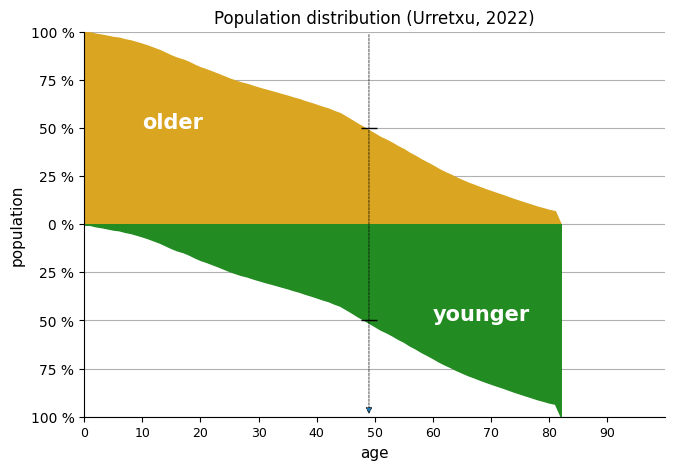

In [21]:
# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=9, rotation=0)
ax.tick_params(axis='y', labelsize=10)
ax.set_title("Population distribution (Urretxu, 2022)", fontsize=12)
ax.set_xlabel("age", fontsize=11)
ax.set_ylabel("population", fontsize=11)
ax.set_xlim(0, 100)
ax.set_ylim(-100, 100)
sns.despine()

ax.fill_between(pop_ages_all.index, 0, pop_ages_all["older_%"], color="goldenrod")
ax.fill_between(pop_ages_all.index, pop_ages_all["younger_%"], 0, color="forestgreen")

ax.set_xticks(range(0, 100, 10), labels=list(range(0, 100, 10)))
ax.set_yticks(range(-100, 125, 25), labels=['100 %', '75 %', '50 %', '25 %', '0 %',
                                            '25 %', '50 %', '75 %', '100 %'])

ax.text(10, 50, "older", fontsize=15, fontweight='demibold', color="white")
ax.text(60, -50, "younger", fontsize=15, fontweight='demibold', color="white")

ax.plot(49, 50, marker="_", markersize=11, color="black")
ax.plot(49, -50, marker="_", markersize=11, color="black")

ax.annotate("", xy=(49, -100), xytext=(49, 100),
            arrowprops=dict(arrowstyle="-|>", linestyle="--", linewidth=0.5))

plt.show()

So here we have it: it turns out that when I turned 49 last year (2022), I was also turning the median age in my town in that same year!

So I am not that old, considering.